# Image Classification with TensorFlow
## Using the MNIST dataset

In [31]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

# Get mnist data set
mnist = input_data.read_data_sets("./data/", one_hot=True, reshape=False)

# Settings
learning_rate = 0.01
training_epochs = 30
batch_size = 256
display_step = 1
n_input = 784       # MNIST images are 28*28 px, =784
n_classes = 10      # number of digits



Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


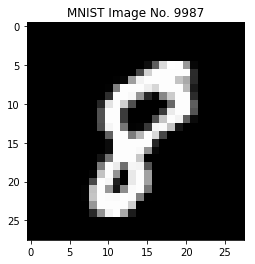

In [49]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

index_of_image_to_view = 9987
plot_title = "MNIST Image No. %s" % index_of_image_to_view

image_pixels_array = mnist.train.images[index_of_image_to_view]
image_pixels_reshaped = np.reshape(image_pixels_array, (28, 28)) 

plt.title(plot_title)
plt.imshow(image_pixels_reshaped, cmap='gray')
plt.show()